In [1]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_dax

In [2]:
daxdata= get_DAX.get()

In [3]:
baseline_df = DAX_baseline.DAX_baseline(daxdata)

In [4]:
baseline_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2023-11-27,DAX,1 day,-3.321265,-0.549640,0.065019,0.718274,2.719772
1,2023-11-27,DAX,2 day,-4.087895,-0.817404,0.077741,0.987420,3.570492
2,2023-11-27,DAX,5 day,-5.259161,-0.912912,0.162904,1.224285,4.628697
3,2023-11-27,DAX,6 day,-6.282629,-1.044070,0.201118,1.443441,5.367396
4,2023-11-27,DAX,7 day,-6.735742,-1.091646,0.338367,1.594461,6.259934


In [5]:
quantile_df = DAX_quantile_regression.DAX_quantile_regression(daxdata)

In [6]:
quantile_df

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2023-11-27,DAX,1 day,-2.309857,-0.511027,0.032938,0.527343,1.769341
1,2023-11-27,DAX,2 day,-2.121984,-0.273882,0.383650,0.896237,2.448753
2,2023-11-27,DAX,5 day,-1.854088,0.044054,0.754976,1.260404,2.710438
3,2023-11-27,DAX,6 day,-1.328234,0.618469,1.359399,1.908589,3.365872
4,2023-11-27,DAX,7 day,-1.284970,0.550528,1.278721,1.795422,3.417913


In [7]:
baseline_model = {
    'name': 'Baseline Model',
    'function': DAX_baseline.DAX_baseline
}
quantile_model = {
    'name': 'Quantile Regression',
    'function': DAX_quantile_regression.DAX_quantile_regression
}


Merged DataFrame in evaluate_and_append:
   forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2023-01-01    DAX   1 day -3.321265 -0.549640  0.065019  0.718274   
1    2023-01-01    DAX   2 day -4.087895 -0.817404  0.077741  0.987420   
2    2023-01-01    DAX   5 day -5.259161 -0.912912  0.162904  1.224285   
3    2023-01-01    DAX   6 day -6.282629 -1.044070  0.201118  1.443441   
4    2023-01-01    DAX   7 day -6.735742 -1.091646  0.338367  1.594461   

     q0.975      actual_forecast_date          Open  ...      ret1      ret2  \
0  2.719772 2023-01-02 00:00:00+01:00  13992.709961  ...  1.040775 -0.017483   
1  3.570492 2023-01-03 00:00:00+01:00  14116.070312  ...  0.795802  1.836577   
2  4.628697 2023-01-06 00:00:00+01:00  14476.719727  ...  1.196103  0.819496   
3  5.367396 2023-01-07 00:00:00+01:00           NaN  ...       NaN       NaN   
4  6.259934 2023-01-08 00:00:00+01:00           NaN  ...       NaN       NaN   

       ret3      ret4      ret5 

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

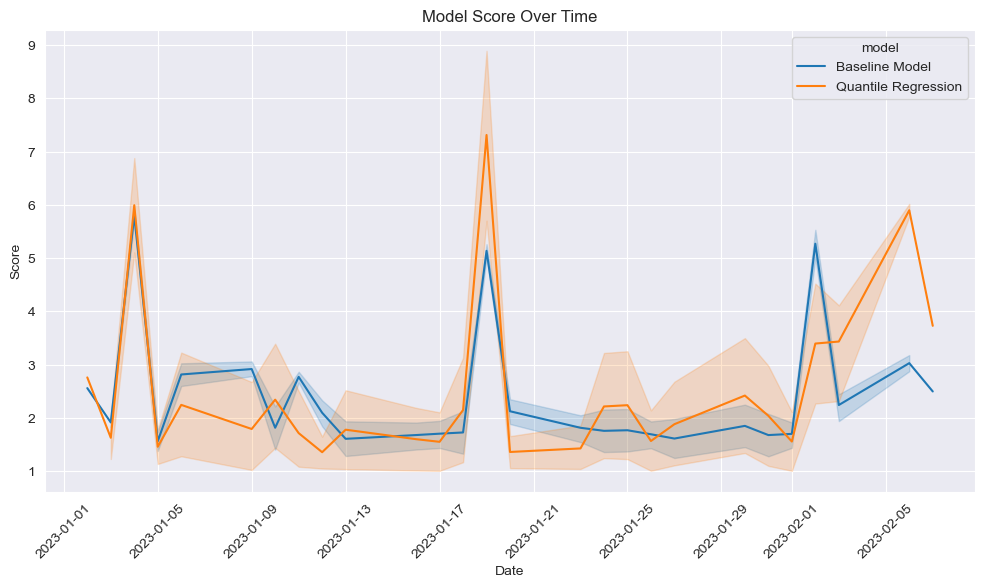

In [8]:
start_date = '2023-01-01'
end_date = '2023-01-31'

evaluation_model1, evaluation_model2 = evaluate_dax.evaluate(baseline_model, quantile_model, daxdata, start_date, end_date)

In [9]:
evaluation_model1['score'].sum()

252.93090939326584

In [10]:
evaluation_model2['score'].sum()

258.31923913508246

In [11]:
evaluation_model1['score'].mean()

2.299371903575144

In [12]:
evaluation_model2['score'].mean()

2.3483567194098405

In [13]:
evaluation_model1['score'].std()

1.1372453588682525

In [14]:
evaluation_model2['score'].std()

1.7036384301291871

In [15]:
from functions import naive_ensemble

In [16]:
evaluation_model1

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2023-01-01,DAX,1 day,-3.321265,-0.549640,0.065019,0.718274,2.719772,2023-01-02 00:00:00+01:00,13992.709961,...,1.026341,0.528502,0.916316,13923.589844,14071.719727,13925.599609,13995.099609,13940.929688,2.556767,Baseline Model
1,2023-01-01,DAX,2 day,-4.087895,-0.817404,0.077741,0.987420,3.570492,2023-01-03 00:00:00+01:00,14116.070312,...,0.778319,1.822144,1.324304,14069.259766,13923.589844,14071.719727,13925.599609,13995.099609,2.003392,Baseline Model
2,2023-01-01,DAX,5 day,-5.259161,-0.912912,0.162904,1.224285,4.628697,2023-01-06 00:00:00+01:00,14476.719727,...,2.975728,3.771530,4.812305,14436.309570,14490.780273,14181.669922,14069.259766,13923.589844,2.596190,Baseline Model
3,2023-01-01,DAX,6 day,-6.282629,-1.044070,0.201118,1.443441,5.367396,2023-01-07 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
4,2023-01-01,DAX,7 day,-6.735742,-1.091646,0.338367,1.594461,6.259934,2023-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2023-01-31,DAX,1 day,-3.321265,-0.549640,0.065019,0.718274,2.719772,2023-02-01 00:00:00+01:00,15125.120117,...,0.202500,0.315968,0.654945,15128.269531,15126.080078,15150.030273,15132.849609,15081.639648,1.217229,Baseline Model
1,2023-01-31,DAX,2 day,-4.087895,-0.817404,0.077741,0.987420,3.570492,2023-02-02 00:00:00+01:00,15275.000000,...,2.501237,2.343025,2.456493,15180.740234,15128.269531,15126.080078,15150.030273,15132.849609,5.654323,Baseline Model
2,2023-01-31,DAX,5 day,-5.259161,-0.912912,0.162904,1.224285,4.628697,2023-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
3,2023-01-31,DAX,6 day,-6.282629,-1.044070,0.201118,1.443441,5.367396,2023-02-06 00:00:00+01:00,15367.040039,...,1.082146,1.428385,1.442859,15476.429688,15509.190430,15180.740234,15128.269531,15126.080078,2.874295,Baseline Model


In [17]:
evaluation_model2

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2023-01-01,DAX,1 day,-2.309857,-0.511027,0.032938,0.527343,1.769341,2023-01-02 00:00:00+01:00,13992.709961,...,1.026341,0.528502,0.916316,13923.589844,14071.719727,13925.599609,13995.099609,13940.929688,2.757845,Quantile Regression
1,2023-01-01,DAX,2 day,-2.121984,-0.273882,0.383650,0.896237,2.448753,2023-01-03 00:00:00+01:00,14116.070312,...,0.778319,1.822144,1.324304,14069.259766,13923.589844,14071.719727,13925.599609,13995.099609,1.225748,Quantile Regression
2,2023-01-01,DAX,5 day,-1.854088,0.044054,0.754976,1.260404,2.710438,2023-01-06 00:00:00+01:00,14476.719727,...,2.975728,3.771530,4.812305,14436.309570,14490.780273,14181.669922,14069.259766,13923.589844,1.277529,Quantile Regression
3,2023-01-01,DAX,6 day,-1.328234,0.618469,1.359399,1.908589,3.365872,2023-01-07 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression
4,2023-01-01,DAX,7 day,-1.284970,0.550528,1.278721,1.795422,3.417913,2023-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2023-01-31,DAX,1 day,-2.309857,-0.511027,0.032938,0.527343,1.769341,2023-02-01 00:00:00+01:00,15125.120117,...,0.202500,0.315968,0.654945,15128.269531,15126.080078,15150.030273,15132.849609,15081.639648,1.036446,Quantile Regression
1,2023-01-31,DAX,2 day,-2.121984,-0.273882,0.383650,0.896237,2.448753,2023-02-02 00:00:00+01:00,15275.000000,...,2.501237,2.343025,2.456493,15180.740234,15128.269531,15126.080078,15150.030273,15132.849609,5.059045,Quantile Regression
2,2023-01-31,DAX,5 day,-1.854088,0.044054,0.754976,1.260404,2.710438,2023-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quantile Regression
3,2023-01-31,DAX,6 day,-1.328234,0.618469,1.359399,1.908589,3.365872,2023-02-06 00:00:00+01:00,15367.040039,...,1.082146,1.428385,1.442859,15476.429688,15509.190430,15180.740234,15128.269531,15126.080078,6.016862,Quantile Regression


In [18]:
ensemble_df = naive_ensemble.ensemble(evaluation_model1, evaluation_model2,0.5,0.5)

In [20]:
ensemble_df

,q0.025,q0.25,q0.5,q0.75,q0.975,forecast_date,target,horizon,actual_forecast_date,Open,...,ret3,ret4,ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,-2.815561,-0.530334,0.048978,0.622808,2.244557,2023-01-01,DAX,1 day,2023-01-02 00:00:00+01:00,13992.709961,...,1.026341,0.528502,0.916316,13923.589844,14071.719727,13925.599609,13995.099609,13940.929688,2.556767,Baseline Model
1,-3.104939,-0.545643,0.230696,0.941829,3.009623,2023-01-01,DAX,2 day,2023-01-03 00:00:00+01:00,14116.070312,...,0.778319,1.822144,1.324304,14069.259766,13923.589844,14071.719727,13925.599609,13995.099609,2.003392,Baseline Model
2,-3.556624,-0.434429,0.458940,1.242344,3.669568,2023-01-01,DAX,5 day,2023-01-06 00:00:00+01:00,14476.719727,...,2.975728,3.771530,4.812305,14436.309570,14490.780273,14181.669922,14069.259766,13923.589844,2.596190,Baseline Model
3,-3.805432,-0.212801,0.780258,1.676015,4.366634,2023-01-01,DAX,6 day,2023-01-07 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
4,-4.010356,-0.270559,0.808544,1.694942,4.838923,2023-01-01,DAX,7 day,2023-01-08 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.815561,-0.530334,0.048978,0.622808,2.244557,2023-01-31,DAX,1 day,2023-02-01 00:00:00+01:00,15125.120117,...,0.202500,0.315968,0.654945,15128.269531,15126.080078,15150.030273,15132.849609,15081.639648,1.217229,Baseline Model
1,-3.104939,-0.545643,0.230696,0.941829,3.009623,2023-01-31,DAX,2 day,2023-02-02 00:00:00+01:00,15275.000000,...,2.501237,2.343025,2.456493,15180.740234,15128.269531,15126.080078,15150.030273,15132.849609,5.654323,Baseline Model
2,-3.556624,-0.434429,0.458940,1.242344,3.669568,2023-01-31,DAX,5 day,2023-02-05 00:00:00+01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baseline Model
3,-3.805432,-0.212801,0.780258,1.676015,4.366634,2023-01-31,DAX,6 day,2023-02-06 00:00:00+01:00,15367.040039,...,1.082146,1.428385,1.442859,15476.429688,15509.190430,15180.740234,15128.269531,15126.080078,2.874295,Baseline Model


In [26]:
import pandas as pd
def evaluate_ensemble_model(ensemble_df, actual_values):
    """
    Evaluate the ensemble model using the provided scoring method.

    :param ensemble_df: DataFrame containing the ensemble forecasts
    :param actual_values: Series or DataFrame containing the actual observed values
    :return: DataFrame with the scores for each horizon in the ensemble forecast
    """
    scores = []
    for index, row in ensemble_df.iterrows():
        forecast_date = row['forecast_date']
        horizon = row['horizon']
        quantile_preds = [row[f'q{q}'] for q in ['0.025', '0.25', '0.5', '0.75', '0.975']]
        obs = actual_values.loc[(actual_values['forecast_date'] == forecast_date) & (actual_values['horizon'] == horizon), 'ret1'].iloc[0]
        score = evaluate_horizon(quantile_preds, obs)
        scores.append({'forecast_date': forecast_date, 'horizon': horizon, 'score': score})

    return pd.DataFrame(scores)

# Example usage
# ensemble_df is your DataFrame containing the ensemble forecasts
# actual_values is your DataFrame containing the actual observed values (e.g., 'Close' prices)
ensemble_scores = evaluate_ensemble_model(ensemble_df, evaluation_model1)
print(ensemble_scores)


    forecast_date horizon     score
0      2023-01-01   1 day  2.657306
1      2023-01-01   2 day  1.614570
2      2023-01-01   5 day  1.936860
3      2023-01-01   6 day       NaN
4      2023-01-01   7 day       NaN
..            ...     ...       ...
150    2023-01-31   1 day  1.126837
151    2023-01-31   2 day  5.356684
152    2023-01-31   5 day       NaN
153    2023-01-31   6 day  4.248428
154    2023-01-31   7 day  2.396999

[155 rows x 3 columns]


In [27]:
ensemble_scores['score'].sum()

234.012097867931

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/sea

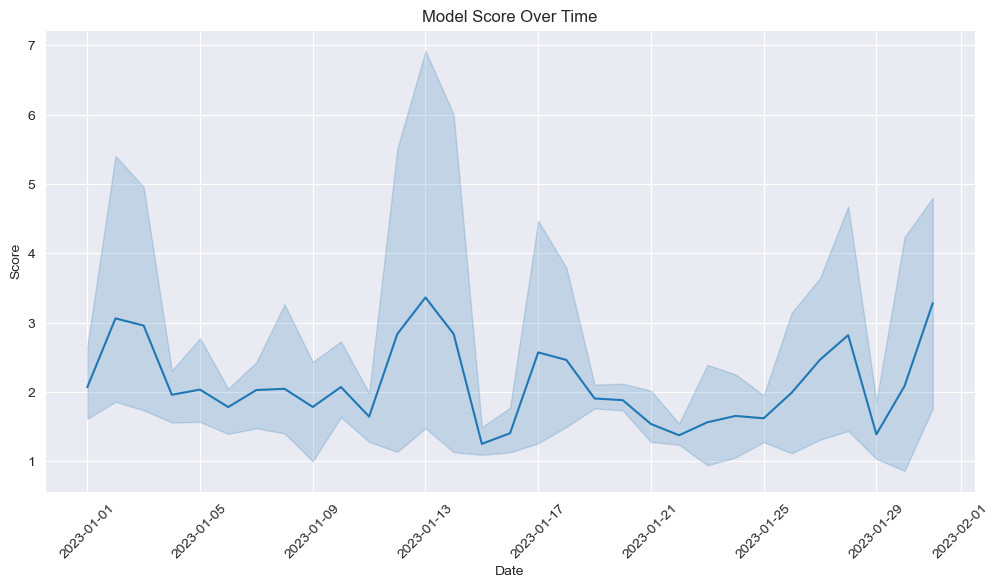

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=ensemble_scores, x='forecast_date', y='score')
plt.title('Model Score Over Time')
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()

NameError: name 'dax_quantile_regression' is not defined

In [32]:
quantile_model=dax_quantile_regression.dax_quantile_regression(daxdata)

NameError: name 'dax_quantile_regression' is not defined

In [ ]:
ensemble_df=naive_ensemble.ensemble(evaluation_model1, evaluation_model2,0.5,0.5)